In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/data.csv')

df = df.applymap(lambda s: s.lower() if type(s) == str else s)
df.head()

,GiftDate,GiftAmount,GiftCode,ZipCode5,State,Gender,MaritalStatus,BirthYear,AgeAtGift,Age,Deceased
0,1/12/1970,100.00,6,46802,in,female,NaN,1925.0,45.0,93.0,1
1,4/6/1970,15000.00,6,55106,mn,female,NaN,1902.0,68.0,116.0,1
2,4/28/1970,2300.00,6,63137,mo,female,married,1921.0,49.0,97.0,1
3,5/1/1970,1000.00,6,50630,ia,female,NaN,1896.0,74.0,122.0,1
4,5/7/1970,8664.38,6,8723,nj,male,married,1901.0,69.0,117.0,1


In [2]:
print("GiftDate \t |" + str(df.GiftDate.isnull().sum()))
print("GiftAmount \t |" + str(df.GiftAmount.isnull().sum()))
print("GiftCode \t |" + str(df.GiftCode.isnull().sum()))
print("ZipCode5 \t |" + str(df.ZipCode5.isnull().sum()))
print("State \t \t |" + str(df.State.isnull().sum()))
print("Gender \t \t |" + str(df.Gender.isnull().sum()))
print("MaritalStatus \t |" + str(df.MaritalStatus.isnull().sum()))
print("BirthYear \t |" + str(df.BirthYear.isnull().sum()))
print("AgeAtGift \t |" + str(df.AgeAtGift.isnull().sum()))
print("Age \t \t |" + str(df.Age.isnull().sum()))
print("Deceased \t |" + str(df.Deceased.isnull().sum()))

GiftDate 	 |0
GiftAmount 	 |0
GiftCode 	 |0
ZipCode5 	 |386
State 	 	 |110
Gender 	 	 |1292
MaritalStatus 	 |7727
BirthYear 	 |7635
AgeAtGift 	 |7635
Age 	 	 |7635
Deceased 	 |0


C:\Users\Harrison Lu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


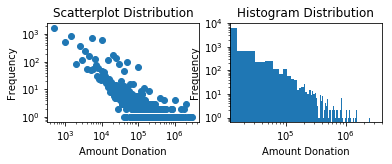

In [3]:
'''frequency distribution of all donations from females. each point represents frequency of donations within 
a range of approximately 500'''

import numpy as np

def graphFrequency(arrayValues, priceRange):
    arrayValues = np.array(arrayValues)
    freqDict = {}
    rangeCounter = 0
    amountRanges = np.linspace(min(arrayValues), max(arrayValues), max(arrayValues)/priceRange)
    amountRanges = [-1] + amountRanges
    for amount in np.sort(arrayValues):
        while amount > amountRanges[rangeCounter] and rangeCounter < len(amountRanges) - 1:
            rangeCounter += 1
        if amountRanges[rangeCounter] in freqDict:
            freqDict[amountRanges[rangeCounter]] += 1
        else:
            freqDict[amountRanges[rangeCounter]] = 1 
    x = []
    y = []
    for key, value in freqDict.items():
        x.append(key)
        y.append(value)
    return x, y
    
def plotDistributions(arrayValues, xArray, yArray):
    plt.figure(1)
    plt.rcParams['figure.figsize'] = [10,10]
    
    plt.subplot(221)
    plt.scatter(xArray, yArray)
    plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
    plt.title("Scatterplot Distribution")
    plt.xlabel("Amount Donation")
    plt.ylabel("Frequency")

    plt.subplot(222)
    plt.hist(arrayValues, 200)
    plt.gca().set_yscale("log")
    plt.gca().set_xscale("log")
    plt.title("Histogram Distribution")
    plt.xlabel("Amount Donation")
    plt.ylabel("Frequency")

    plt.show()

    
amountArrayFemale = []
for giftAmount in df.loc[df.Gender == "female"].GiftAmount:
    amountArrayFemale.append(giftAmount)

x, y = graphFrequency(amountArrayFemale, 500)
plotDistributions(amountArrayFemale, x, y)

C:\Users\Harrison Lu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


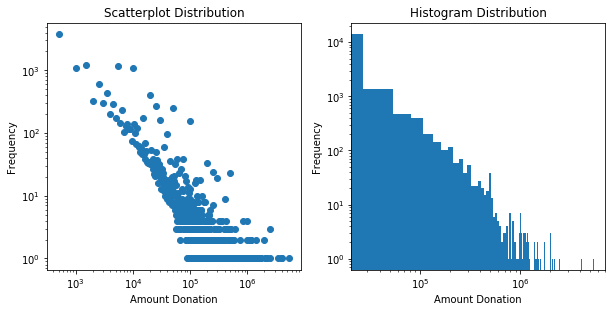

In [4]:
amountArrayMale = []
for giftAmount in df.loc[df.Gender == "male"].GiftAmount:
    amountArrayMale.append(giftAmount)

x, y = graphFrequency(amountArrayMale, 500)
plotDistributions(amountArrayMale, x, y)

In [5]:
'''look at span of data, impossible to estimate with just a few variables'''
def avgGiftGender(gender):
    total = 0
    count = 0
    for giftAmount in df.loc[df.Gender == gender].GiftAmount:
        total += giftAmount
        count += 1
    return total/count

amountArrayFemale = np.array(amountArrayFemale)
amountArrayMale = np.array(amountArrayMale)


# print("Average donation for females are: %s" % (avgGiftGender("female")))
# print("Average donation for males are: %s" % (avgGiftGender("male")))

print(f"Female donation mean: {np.average(amountArrayFemale)} with SD: {np.std(amountArrayFemale)}. Median: {np.median(amountArrayFemale)}")
print(f"Male donation mean: {np.average(amountArrayMale)} with SD: {np.std(amountArrayMale)}. Median: {np.median(amountArrayMale)}")

df2 = df.sort_values(by=['GiftAmount'], ascending = False)
print(df2.head())
df2 = df.sort_values(by=['GiftAmount'], ascending = True)
print(df2.head())

Female donation mean: 29627.987199012437 with SD: 128406.84594312916. Median: 4025.04
Male donation mean: 31557.353209241475 with SD: 123429.64764353145. Median: 5000.0
        GiftDate  GiftAmount  GiftCode ZipCode5 State  Gender MaritalStatus  \
7110   8/18/1997  5402615.00         5    65049    mo    male           NaN   
19650  2/23/2010  4100000.00         4      NaN    ne    male       married   
3191   3/12/1992  3867500.00         5    60143    il    male       widowed   
9969    2/2/2001  3400000.00         5    88033    nm    male           NaN   
24685   5/4/2016  3051002.21         4    48625    mi  female     separated   

       BirthYear  AgeAtGift    Age  Deceased  
7110      1915.0       82.0  103.0         1  
19650     1922.0       88.0   96.0         1  
3191      1913.0       79.0  105.0         1  
9969      1941.0       60.0   77.0         0  
24685     1943.0       73.0   75.0         0  
        GiftDate  GiftAmount  GiftCode ZipCode5 State Gender MaritalStatus

In [6]:
'''try a few more independent variables, see results'''
#look at state
import operator

def analyzeIndependentVariable(independentVar):
    varDict = {}
    for index, row in df.iterrows():
        variable = row[independentVar]
        if variable != "nan":
            if variable in varDict:
                varDict[variable] = [varDict[variable][0], varDict[variable][1] + row["GiftAmount"], varDict[variable][2] + 1]
            else:
                varDict[variable] = [index, row["GiftAmount"], 1]

    for key, value in varDict.items():
        varDict[key] = [varDict[key][1]/varDict[key][2], varDict[key][2]]

    sortedDictHighAvg = dict(sorted(varDict.items(), key=operator.itemgetter(1), reverse=True)[:5])
    sortedDictLowAvg = dict(sorted(varDict.items(), key=operator.itemgetter(1), reverse=False)[:5])
    sortedDictHighCount = dict(sorted(varDict.items(), key=lambda x: x[1][1], reverse=True)[:5])
    sortedDictLowCount = dict(sorted(varDict.items(), key=lambda x: x[1][1], reverse=False)[:5])

    return varDict, sortedDictHighAvg, sortedDictLowAvg, sortedDictHighCount, sortedDictLowCount

stateDict, sortedDictHighAvg, sortedDictLowAvg, sortedDictHighCount, sortedDictLowCount = analyzeIndependentVariable("State")
print(sortedDictHighAvg)
print(sortedDictLowAvg)
print(sortedDictHighCount)
print(sortedDictLowCount)




{'me': [136544.676, 5], 'hi': [105834.03111111112, 9], 'nh': [91720.41666666667, 27], 'ga': [83669.50353846155, 65], 'ae': [83180.0, 5]}
{'ap': [1000.0, 1], 'dc': [1000.0, 3], 'as': [2500.0, 1], 'nj': [2959.7411626506, 1660], 'sc': [4891.42074074074, 81]}
{'mn': [26493.670730268517, 2458], 'wi': [25110.013050064183, 2337], 'mo': [35909.4481853095, 2294], 'il': [31686.553878461542, 1950], 'mi': [22540.276409560018, 1841]}
{'ap': [1000.0, 1], 'as': [2500.0, 1], 'dc': [1000.0, 3], 'ae': [83180.0, 5], 'me': [136544.676, 5]}


In [7]:
def prettyPrintDict(dictionary):
    for key, value in dictionary.items():
        print(str(key) + " | " + str(value[0]) + " | " + str(value[1]))
        
prettyPrintDict(sortedDictLowCount)

ap | 1000.0 | 1
as | 2500.0 | 1
dc | 1000.0 | 3
ae | 83180.0 | 5
me | 136544.676 | 5


State | Average Donation ($) | Number of Donations
--|--|--
ap | 1000.0 | 1
as | 2500.0 | 1
dc | 1000.0 | 3
ae | 83180.0 | 5
me | 136544.676 | 5

In [8]:
'''try zip code'''

zipDict, sortedDictHighAvg, sortedDictLowAvg, sortedDictHighCount, sortedDictLowCount = analyzeIndependentVariable("ZipCode5")
    
print(sortedDictHighAvg)
print(sortedDictLowAvg)
print(sortedDictHighCount)
print(sortedDictLowCount)


{'65049': [5402615.0, 1], '33067': [2480000.0, 1], '98407': [2100000.0, 1], '67402': [1647279.6666666667, 3], '60143': [1290166.6666666667, 3]}
{'58801': [1.0, 1], '75701': [1.0, 1], '68343': [1.0, 2], '48030': [1.0, 3], '22152': [1.0, 5]}
{nan: [96984.5844559586, 386], '32765': [21659.160483870968, 217], '46514': [2462.8750632911324, 158], '56031': [26657.207337662316, 154], '68434': [35225.86749999999, 152]}
{'68862': [600.0, 1], '32505': [1000.0, 1], '7042': [10000.0, 1], '22407': [1000.0, 1], '53525': [2000.0, 1]}


In [9]:
prettyPrintDict(sortedDictLowCount)

68862 | 600.0 | 1
32505 | 1000.0 | 1
7042 | 10000.0 | 1
22407 | 1000.0 | 1
53525 | 2000.0 | 1


Zip Code | Average Donation ($) | Number of Donations
--|--|--
68862 | 600.0 | 1
32505 | 1000.0 | 1
7042 | 10000.0 | 1
22407 | 1000.0 | 1
53525 | 2000.0 | 1

In [10]:
'''try marital status'''

maritalStatusDict = {}
for index, row in df.iterrows():
    married = row["MaritalStatus"]
    if str(married) != "nan":
        if married in maritalStatusDict:
            maritalStatusDict[married] = [maritalStatusDict[married][0], maritalStatusDict[married][1] + row["GiftAmount"], maritalStatusDict[married][2] + 1]
        else:
            maritalStatusDict[married] = [index, row["GiftAmount"], 1]

for key, value in maritalStatusDict.items():
    maritalStatusDict[key] = [maritalStatusDict[key][1]/maritalStatusDict[key][2], maritalStatusDict[key][2]]
    
print(maritalStatusDict)

prettyPrintDict(maritalStatusDict)

{'married': [30173.151209176733, 13589], 'widow': [75090.942839779, 905], 'widowed': [33602.34934706545, 1772], 'single': [26462.13000781305, 2803], 'divorced': [43440.126081081085, 74], 'separated': [290104.9442307692, 26], 'u': [5000.0, 1]}
married | 30173.151209176733 | 13589
widow | 75090.942839779 | 905
widowed | 33602.34934706545 | 1772
single | 26462.13000781305 | 2803
divorced | 43440.126081081085 | 74
separated | 290104.9442307692 | 26
u | 5000.0 | 1


Marital Status | Average Donation ($) | Number of Donations
--|--|--
married | 30173.151209176733 | 13589
widow | 75090.942839779 | 905
widowed | 33602.34934706545 | 1772
single | 26462.13000781305 | 2803
divorced | 43440.126081081085 | 74
separated | 290104.9442307692 | 26

Text(0,0.5,'Age')

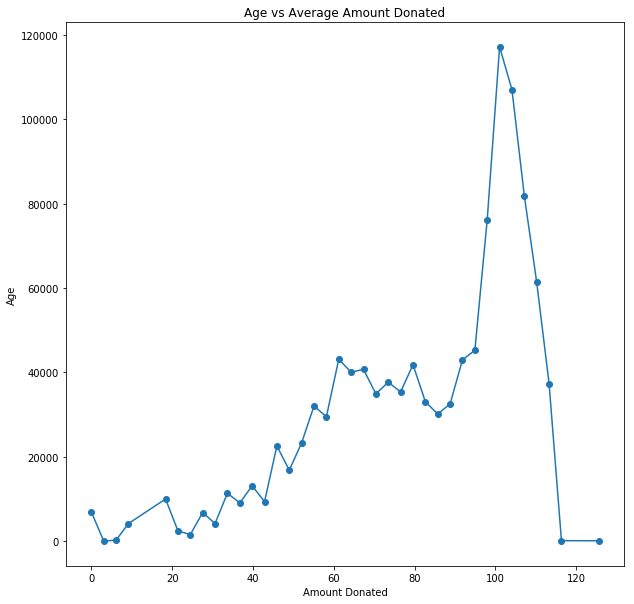

In [11]:
'''try age at gift'''

ageDonationArray = []
for index, row in df.iterrows():
    age = row["AgeAtGift"]
    donation = row["GiftAmount"]
    if str(age) != "nan":
        ageDonationArray.append((age, donation))
        
ageDict = {}
rangeCounter = 0
amountRanges = np.linspace(0, 150, 50)
for age, amount in sorted(ageDonationArray, key = lambda x: x[0], reverse = False):
    while age > amountRanges[rangeCounter] and rangeCounter < len(amountRanges) - 1:
        rangeCounter += 1
    if amountRanges[rangeCounter] in ageDict:
        ageDict[amountRanges[rangeCounter]][0] += amount
        ageDict[amountRanges[rangeCounter]][1] += 1
    else:
        ageDict[amountRanges[rangeCounter]] = [amount, 1]

x = []
y = []
yAvg = []

for key, value in ageDict.items():
    averageValue = value[0]/value[1]
    x.append(key)
    y.append(averageValue)
    

plt.scatter(x, y)
plt.plot(x, y)
plt.title("Age vs Average Amount Donated")
plt.xlabel("Amount Donated")
plt.ylabel("Age")

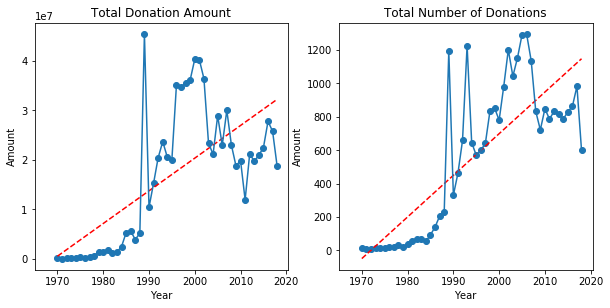

In [12]:
'''total donations per year'''
import re

yearDonationArray = []
for index, row in df.iterrows():
    date = row["GiftDate"]
    match = re.search(r'(\d+)\/(\d+)\/(\d+)', date)
    year = match.group(3)
    donation = row["GiftAmount"]
    if str(year) != "nan":
        yearDonationArray.append((year, donation))
        
yearDict = {}
for year, amount in sorted(yearDonationArray, key = lambda x: x[0], reverse = False):
    if year in yearDict:
        yearDict[year][0] += amount
        yearDict[year][1] += 1
    else:
        yearDict[year] = [amount, 1]

x = []
yAmount = []
yCount = []

for key, value in yearDict.items():
#    averageValue = value[0]/value[1]
    averageValue = value[0]
    x.append(int(key))
    yAmount.append(float(averageValue))
    yCount.append(int(value[1]))
    
plt.figure(1)
plt.rcParams['figure.figsize'] = [10, 10]

plt.subplot(221)
plt.scatter(x, yAmount)
z = np.polyfit(x, yAmount, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--')
plt.plot(x, yAmount)
plt.xlim(xmin=1965)
plt.title("Total Donation Amount")
plt.xlabel("Year")
plt.ylabel("Amount")

plt.subplot(222)
plt.scatter(x, yCount)
z = np.polyfit(x, yCount, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--')
plt.plot(x, yCount)
plt.xlim(xmin=1965)
plt.title("Total Number of Donations")
plt.xlabel("Year")
plt.ylabel("Amount")

plt.show()

In [13]:
'''regresion with number of people who donates as well as year of donations'''
from sklearn.linear_model import LinearRegression as linReg
from sklearn.model_selection import train_test_split as crossval

features = []
labels = []

for key, value in yearDict.items():
    features.append([int(key), value[1]])
    labels.append(value[0])

scores = []
for x in range(5000):
    XTrain, XTest, yTrain, yTest = crossval(features, labels, test_size = 0.2)
    model = linReg().fit(XTrain, yTrain)
    scores.append(model.score(XTest, yTest))
    
scores = np.array(scores)
print(f"Mean score in {len(scores)} trials is: {np.average(scores)} with SD {np.std(scores)}")

Mean score in 5000 trials is: 0.6743376766773108 with SD 0.19118658284306314


[12, 34, 20, 33, 6, 5, 43, 16, 34, 13, 4, 46, 9, 10, 28, 33, 36, 42, 25, 46, 27, 36, 34, 9, 3]
49
30


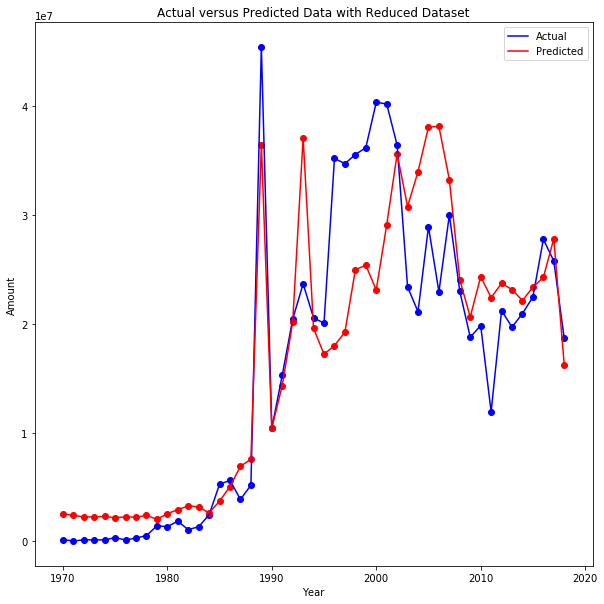

In [14]:
'''plot of actual vs regression model'''
import random
removeIndex = [random.randint(1, len(features)) for x in range(25)]

print(removeIndex)

features1 = []
labels1 = []

for x in range(len(features)):
    if not (x in removeIndex):
        features1.append(features[x])
        labels1.append(labels[x])
        
print(len(features))
print(len(features1))

XTrain, XTest, yTrain, yTest = crossval(features1, labels1, test_size = 0.2)
model = linReg().fit(XTrain, yTrain)



xActual = []
yActual = []

xPredicted = []
yPredicted = []

for year, amount in yearDict.items():
    xActual.append(int(year))
    yActual.append(amount[0])
    xPredicted.append(int(year))
    yPredicted.append(model.predict([[int(year), amount[1]]]))
    
plt.title("Actual versus Predicted Data with Reduced Dataset")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.scatter(xActual, yActual, color = 'b')
plt.plot(xActual, yActual, color = 'b', label = "Actual")
plt.scatter(xPredicted, yPredicted, color = 'r')
plt.plot(xPredicted, yPredicted, color = 'r', label = "Predicted")
plt.legend()
plt.show()


In [15]:
import scipy

def testRandomRemovalStatistics(features, labels):
    removeIndex = [random.randint(1, len(features)) for x in range(25)]
    features1 = []
    labels1 = []
    for x in range(len(features)):
        if not (x in removeIndex):
            features1.append(features[x])
            labels1.append(labels[x])
    XTrain, XTest, yTrain, yTest = crossval(features1, labels1, test_size = 0.2)
    model = linReg().fit(XTrain, yTrain)
    xActual = []
    yActual = []
    xPredicted = []
    yPredicted = []
    for year, amount in yearDict.items():
        xActual.append(int(year))
        yActual.append(amount[0])
        xPredicted.append(int(year))
        yPredicted.append(model.predict([[int(year), amount[1]]]))
    yPredicted = np.array(yPredicted).reshape(49)
    return yPredicted
def statistics(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return slope, intercept, r_value**2, p_value, std_err

y = []
std_errArray = []
r_valueSquaredArray = []
for year, summation in yearDict.items():
    y.append(summation[0])
    
for x in range(1000): 
    yPredicted = testRandomRemovalStatistics(features, labels)
    slope, intercept, r_valueSquared, p_value, std_err = statistics(yPredicted, y)
    std_errArray.append(std_err)
    r_valueSquaredArray.append(r_valueSquared)
    
std_errArray = np.array(std_errArray)
r_valueSquaredArray = np.array(r_valueSquaredArray)

print(f"R value squared mean: {np.average(r_valueSquaredArray)}. SD: {np.std(r_valueSquaredArray)}")
print(f"SD mean: {np.average(std_errArray)}. SD: {np.std(std_errArray)}")

R value squared mean: 0.7454299009442451. SD: 0.010339949941562336
SD mean: 0.08397392661556691. SD: 0.008523269770707614


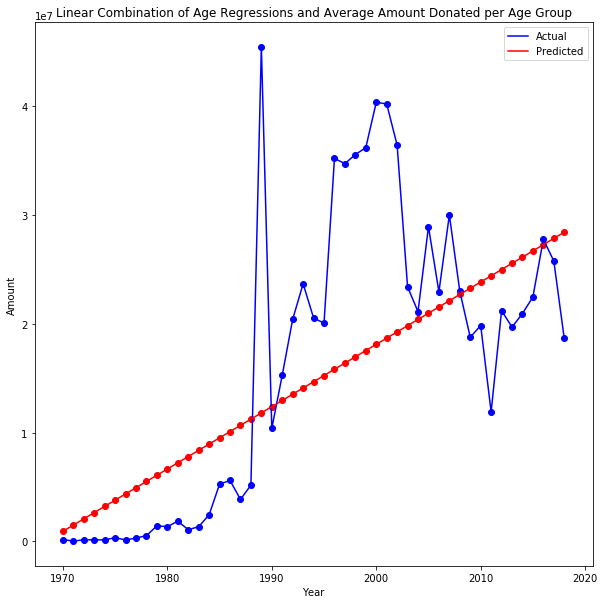

In [16]:
'''linear combination of different regressions'''

yearAgeArray = []
yearArray = []
ageArray = []
for index, row in df.iterrows():
    age = row["AgeAtGift"]
    year = re.search(r'(\d+)\/(\d+)\/(\d+)', row["GiftDate"]).group(3)
    yearArray.append(year)
    if str(age) != "nan":
        yearAgeArray.append((year, age))

yearArray = sorted(set(yearArray))


ageYearDict = {}
rangeCounter = 0
amountRanges = np.linspace(0, 150, 50)
for year, age in sorted(yearAgeArray, key = lambda x: x[1], reverse = False):
    while age > amountRanges[rangeCounter] and rangeCounter < len(amountRanges) - 1:
        rangeCounter += 1
    roundedAge = round(amountRanges[rangeCounter])
    if year in ageYearDict:
        if roundedAge in ageYearDict[year]:
            ageYearDict[year][roundedAge] += 1
        else:
            ageYearDict[year][roundedAge] = 1
    else:
        ageYearDict[year] = {roundedAge : 1}

# for year, ageDict in sorted(ageYearDict.items(), reverse = False):
#     for x in amountRanges:
#         x = round(x)
#         ageDict

ageYearTimeDict = {}

for age in amountRanges:
    ageYearCount = []
    age = round(age)
    for year in yearArray:
        if age in ageYearDict[year]:
            ageYearCount.append(ageYearDict[year][age])
        else:
            ageYearCount.append(0)
    ageYearTimeDict[age] = ageYearCount
    
yearArray = np.array([int(year) for year in yearArray]).reshape(-1, 1)
ageModelDict = {}

for age, counts in ageYearTimeDict.items():
    model = linReg().fit(yearArray, counts)
    ageModelDict[age] = model
    
roundedAgeDict = {}
for age, amount in ageDict.items():
    roundedAgeDict[round(age)] = [ageDict[age][0]/ageDict[age][1]]
    roundedAgeDict[round(age)].append(ageDict[age][1])
    
predictedSums = {}
for year in yearArray:
    summation = 0.
    for age, model in ageModelDict.items():
        if age in roundedAgeDict:
            summation += float(model.predict(int(year))) * float(roundedAgeDict[age][0])
    predictedSums[int(year)] = summation

xActual = []
yActual = []
xPredicted = []
yPredicted = []
for year, amount in yearDict.items():
    xActual.append(int(year))
    yActual.append(amount[0])
    xPredicted.append(int(year))
    yPredicted.append(predictedSums[int(year)])
    
plt.title("Linear Combination of Age Regressions and Average Amount Donated per Age Group")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.scatter(xActual, yActual, color = 'b')
plt.plot(xActual, yActual, color = 'b', label = "Actual")
plt.scatter(xPredicted, yPredicted, color = 'r')
plt.plot(xPredicted, yPredicted, color = 'r', label = "Predicted")
plt.legend()
plt.show()

In [17]:
'''evaluation of above combination'''
import scipy

def statistics(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return slope, intercept, r_value**2, p_value, std_err

x = []
y = []


for year, summation in predictedSums.items():
    x.append(summation)
for year, summation in yearDict.items():
    y.append(summation[0])
    
print(statistics(x, y))


(1.1537326970461135, -559023.0832470674, 0.47452582723729325, 4.457330651862366e-08, 0.1770932597039812)


In [88]:
'''knn to predict number of people who donate in a particular year'''
decadeData = []
toPredictArray = []

for x in range(1970, 2018):
    decadeData.append(yearDict[str(x)][1])
    
print(decadeData)
    
def genFeatureDict(data, frame): 
    featureDict = {}
    x = frame
    for x in range(frame, len(data)):
        valuesArray = []
        print(data[x])
        for y in range(x-10, x):
            valuesArray.append(data[y])
        print(valuesArray)
        featureDict[data[x]] = valuesArray
    return featureDict

def generateFeaturesLabels(dictionary): 
    labels = []
    features = []
    for x, y in dictionary.items():
        labels.append(x)
        features.append(y)
    return features, labels

def generateToPredictArray(dictionary, year):
    year1 = year + 1
    for x in range(year-10, year):
        outputArray.append(dictionary)

def predictValueForYear(data, frame, year):
    generatedData = data[:]
    x = 2018
    featureDict = genFeatureDict(generatedData, frame)
    features, labels = generateFeaturesLabels(featureDict)
    while x <= year:
        model = kNN(n_neighbors = 5)
        model.fit(features, labels)
        toPredictArray = generatedData[-10:]
        prediction = int(model.predict([toPredictArray]))
        print(f"Predicted data for year {x} is {prediction}")
        generatedData.append(prediction)
        featureDict = genFeatureDict(generatedData, frame)
        features, labels = generateFeaturesLabels(featureDict)
        x += 1
    return prediction


predictValueForYear(decadeData, 10, 2020)


# pastDecadeData = genFeatureDict(decadeData, 10)
# features, labels = generateFeaturesLabels(pastDecadeData)

# for x in range(2009, 2019):
#     toPredictArray.append(yearDict[str(x)][1])


# from sklearn.neighbors import KNeighborsClassifier as kNN

# for x in range(10, len(decadeData)): 
#     droppedData = decadeData


# #predict unknown year 2018
# model = kNN(n_neighbors = 5)
# model.fit(features, labels)
# model.predict([toPredictArray])

[13, 11, 9, 12, 16, 15, 20, 22, 30, 21, 41, 56, 70, 70, 54, 93, 140, 205, 229, 1192, 330, 462, 658, 1225, 645, 569, 598, 642, 835, 852, 779, 980, 1200, 1042, 1151, 1290, 1295, 1135, 832, 721, 847, 786, 832, 816, 785, 829, 861, 982]
41
[13, 11, 9, 12, 16, 15, 20, 22, 30, 21]
56
[11, 9, 12, 16, 15, 20, 22, 30, 21, 41]
70
[9, 12, 16, 15, 20, 22, 30, 21, 41, 56]
70
[12, 16, 15, 20, 22, 30, 21, 41, 56, 70]
54
[16, 15, 20, 22, 30, 21, 41, 56, 70, 70]
93
[15, 20, 22, 30, 21, 41, 56, 70, 70, 54]
140
[20, 22, 30, 21, 41, 56, 70, 70, 54, 93]
205
[22, 30, 21, 41, 56, 70, 70, 54, 93, 140]
229
[30, 21, 41, 56, 70, 70, 54, 93, 140, 205]
1192
[21, 41, 56, 70, 70, 54, 93, 140, 205, 229]
330
[41, 56, 70, 70, 54, 93, 140, 205, 229, 1192]
462
[56, 70, 70, 54, 93, 140, 205, 229, 1192, 330]
658
[70, 70, 54, 93, 140, 205, 229, 1192, 330, 462]
1225
[70, 54, 93, 140, 205, 229, 1192, 330, 462, 658]
645
[54, 93, 140, 205, 229, 1192, 330, 462, 658, 1225]
569
[93, 140, 205, 229, 1192, 330, 462, 658, 1225, 645]
59

861

In [62]:
print(decadeData)
decadeData[-10:]

[13, 11, 9, 12, 16, 15, 20, 22, 30, 21, 41, 56, 70, 70, 54, 93, 140, 205, 229, 1192, 330, 462, 658, 1225, 645, 569, 598, 642, 835, 852, 779, 980, 1200, 1042, 1151, 1290, 1295, 1135, 832, 721, 847, 786, 832, 816, 785, 829, 861, 982]


[832, 721, 847, 786, 832, 816, 785, 829, 861, 982]